In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle
import datetime
import re
import pyActigraphy

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import utils as wearutils
from wearables.scripts import data_v42 as weardata

import torch

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur


All raw2modeldata pp done in 27.9-min
Data written to /home/ngrav/data/wearables/MOD1000_modeldata.pkl


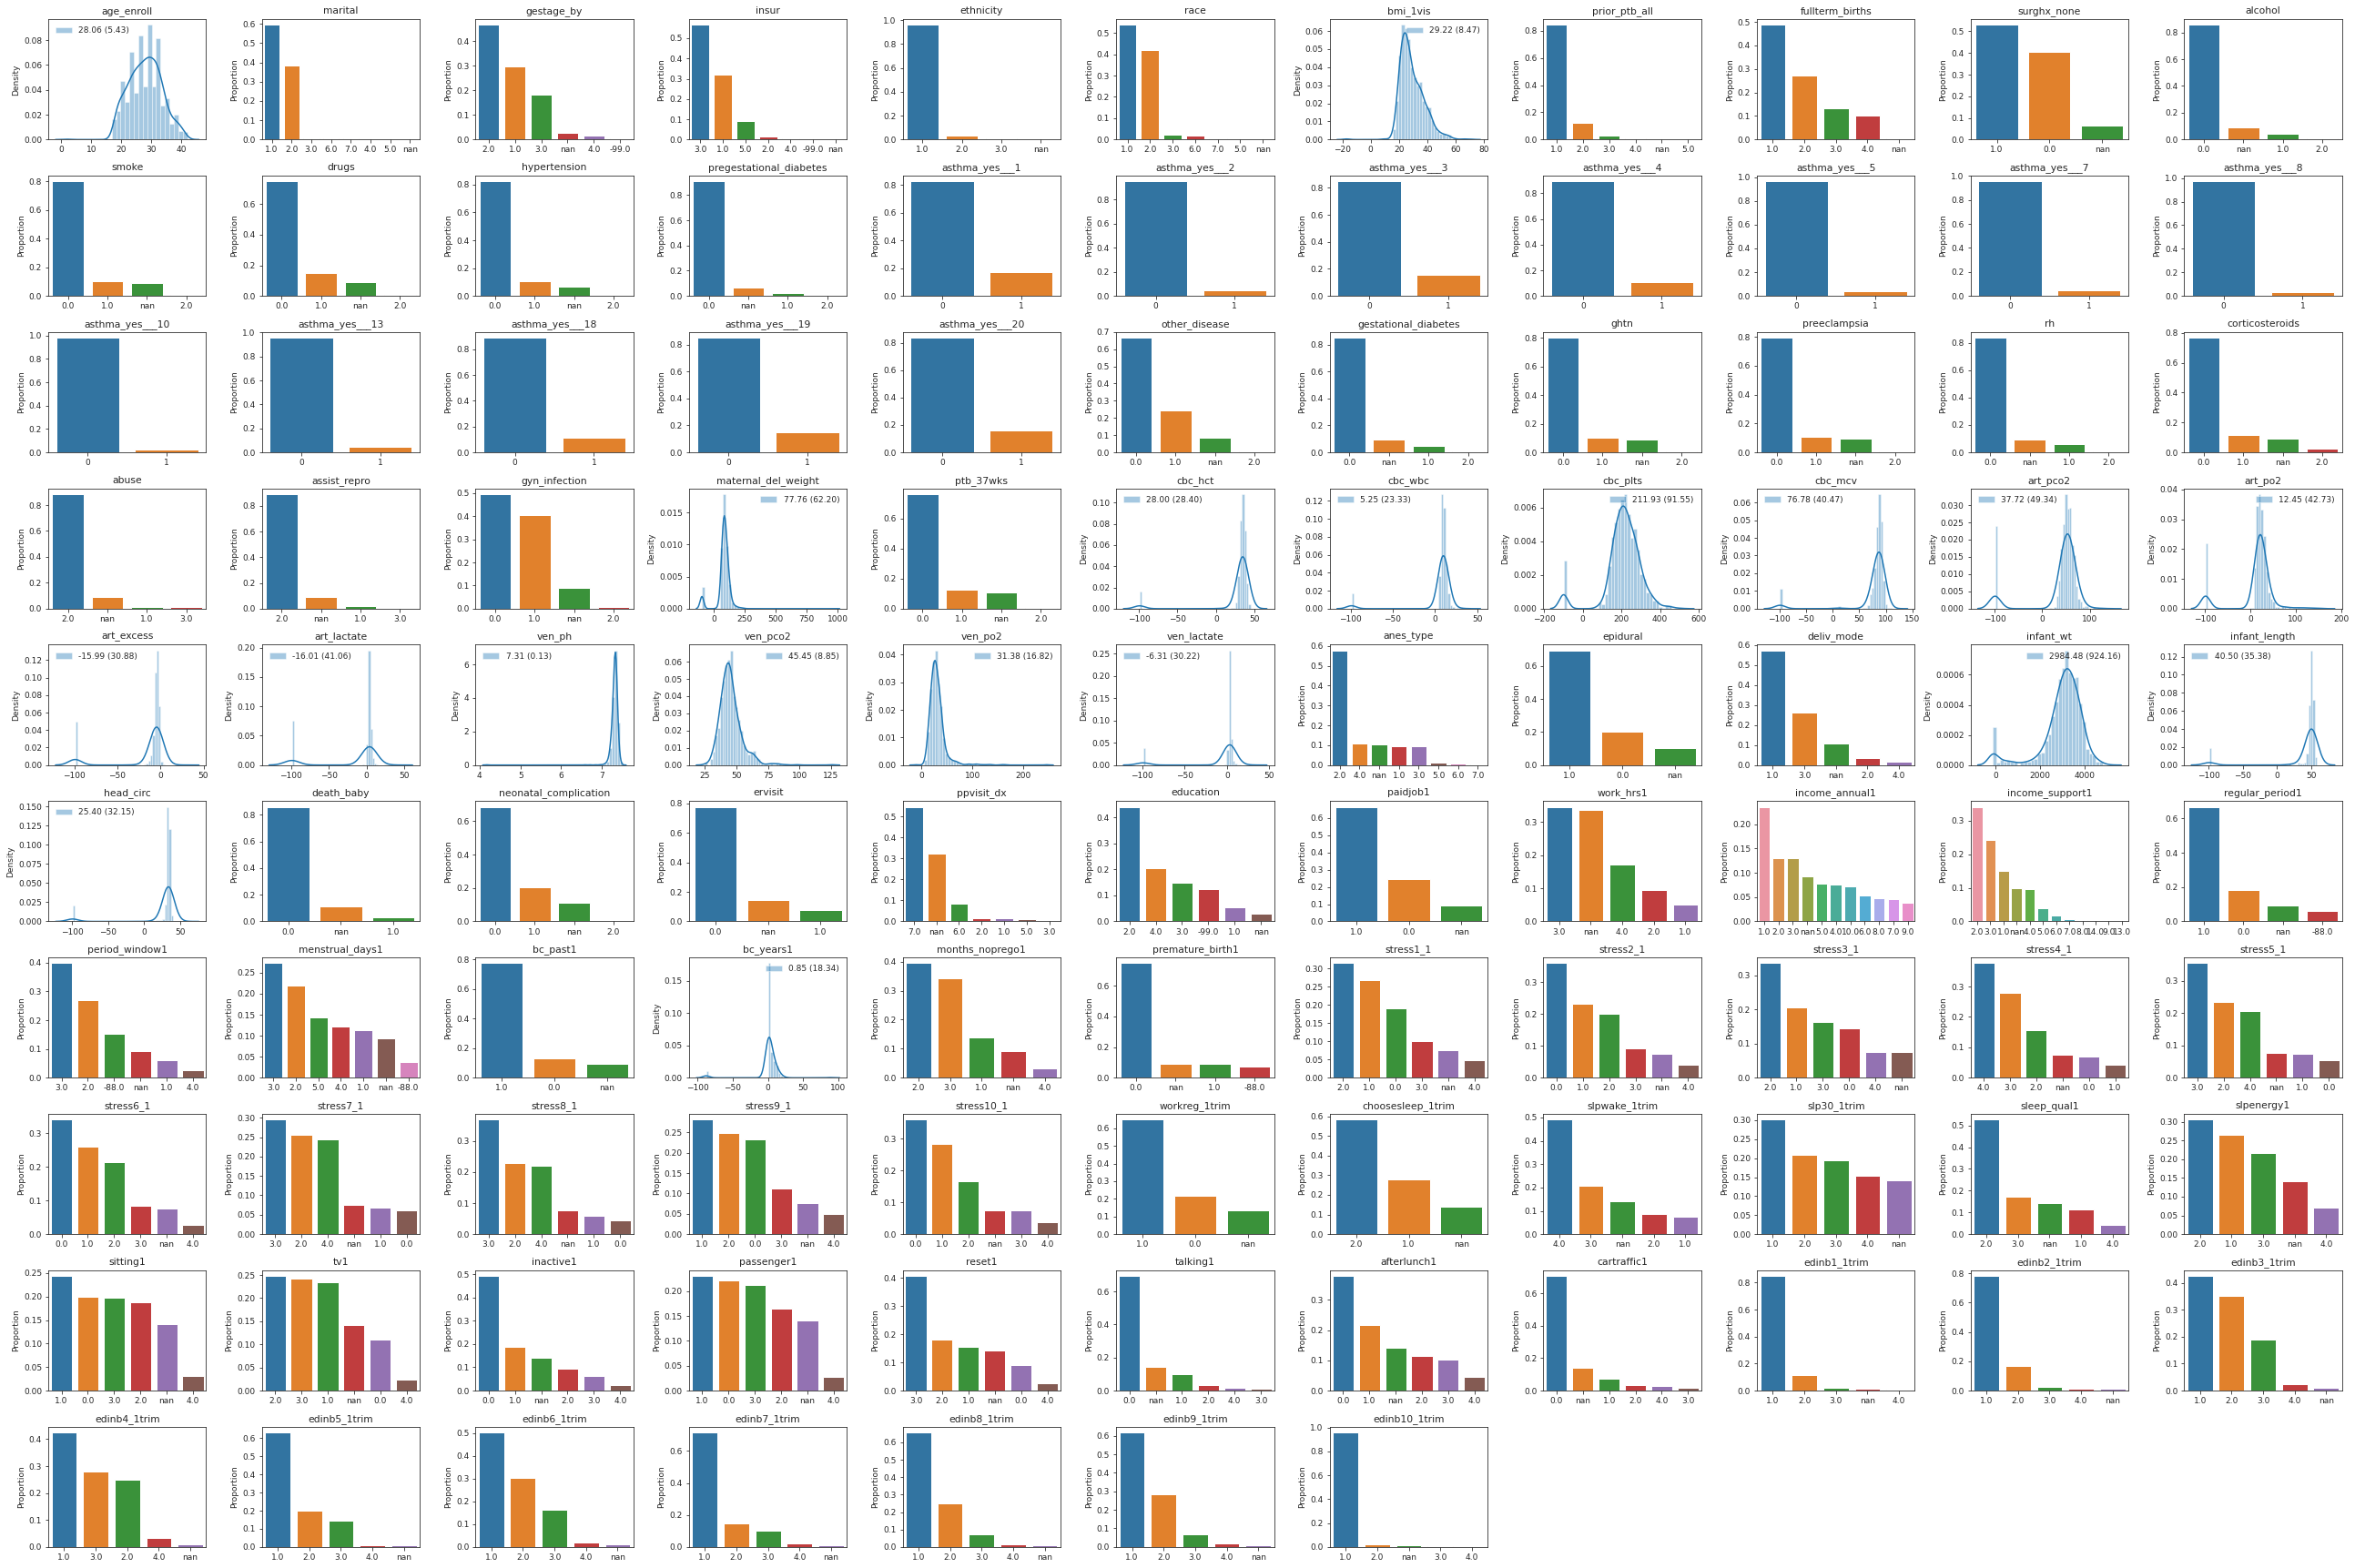

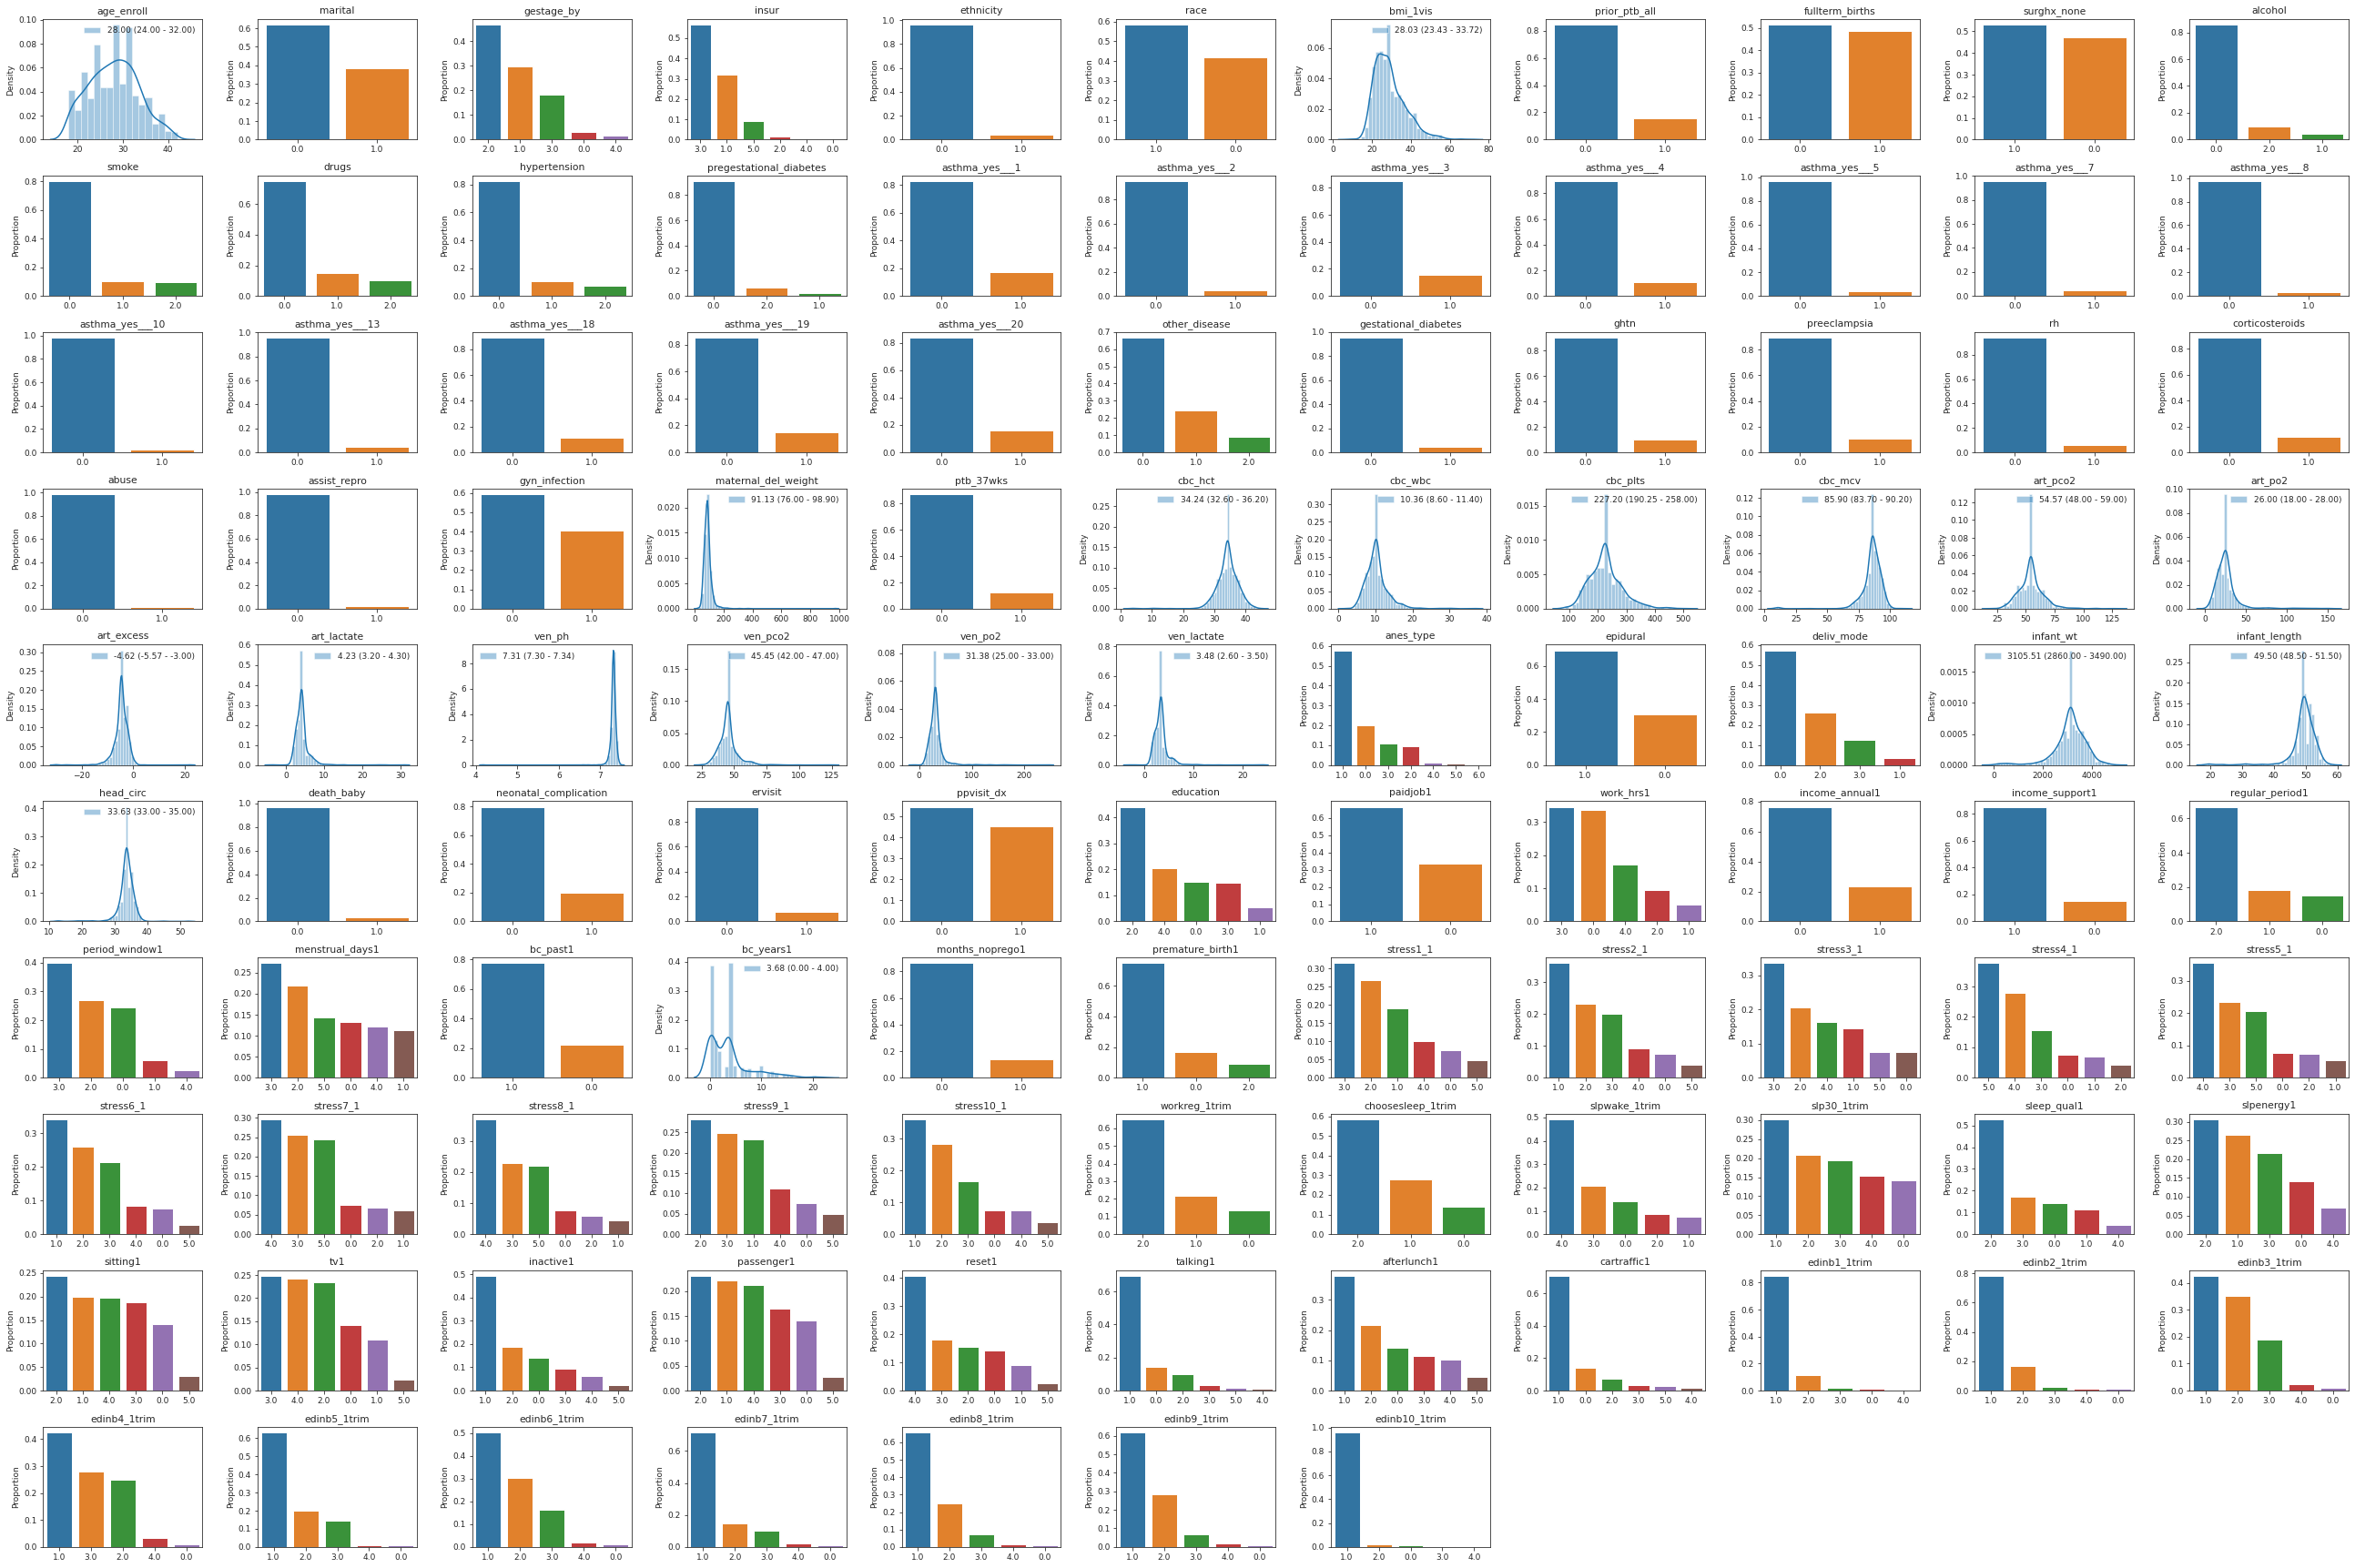

In [2]:
filename = '/home/ngrav/data/wearables/MOD1000_modeldata.pkl'

# fx
rawdata = weardata.raw2df()
outs = {'IDs':rawdata.IDs, 'data': rawdata.data, 'md_summary': rawdata.md_summary, 'voi': rawdata.voi, 'cat_class_enc':rawdata.cat_class_encoding}
with open(filename, 'wb') as f:
    pickle.dump(outs, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()
print('Data written to {}'.format(filename)) 

In [6]:
rawdata.voi['age_enroll'][1]

'continuous'

In [13]:
rawdata.raw_md['bc_years1'].replace(-88, np.nan)

9       0.0
10      NaN
11      NaN
12      0.0
13      NaN
       ... 
1521    9.0
1523    NaN
1524    NaN
1526    2.0
1528    2.0
Name: bc_years1, Length: 1230, dtype: float64

In [5]:
np.random.choice(list(rawdata.data.keys()), 3)

array(['1299_20', '1004_9', '1447_15'], dtype='<U8')

In [21]:
torch.tensor(float('1')).dtype

torch.float32

In [14]:
k = '1299_20'
torch.cat((torch.tensor(rawdata.data[k]['activity'], dtype=torch.float32)[:-1].reshape(1, -1), 
           torch.tensor(rawdata.data[k]['light'], dtype=torch.float32)[:-1].reshape(1, -1)), dim=0).shape

torch.Size([2, 10080])

In [18]:
rawdata.data[k]['md']['race']

{'record_id': 1299,
 'age_enroll': 33.0,
 'marital': 0.0,
 'gestage_by': 1.0,
 'insur': 1.0,
 'ethnicity': 0.0,
 'race': 1.0,
 'bmi_1vis': 39.323524,
 'prior_ptb_all': 1.0,
 'fullterm_births': 0.0,
 'surghx_none': 1.0,
 'alcohol': 0.0,
 'smoke': 0.0,
 'drugs': 1.0,
 'hypertension': 0.0,
 'pregestational_diabetes': 0.0,
 'asthma_yes___1': 0.0,
 'asthma_yes___2': 0.0,
 'asthma_yes___3': 0.0,
 'asthma_yes___4': 0.0,
 'asthma_yes___5': 0.0,
 'asthma_yes___7': 0.0,
 'asthma_yes___8': 0.0,
 'asthma_yes___10': 0.0,
 'asthma_yes___13': 0.0,
 'asthma_yes___18': 0.0,
 'asthma_yes___19': 1.0,
 'asthma_yes___20': 1.0,
 'other_disease': 0.0,
 'gestational_diabetes': 0.0,
 'ghtn': 0.0,
 'preeclampsia': 0.0,
 'rh': 0.0,
 'corticosteroids': 1.0,
 'abuse': 1.0,
 'assist_repro': 0.0,
 'gyn_infection': 1.0,
 'maternal_del_weight': 110.2,
 'ptb_37wks': 1.0,
 'cbc_hct': 30.8,
 'cbc_wbc': 6.2,
 'cbc_plts': 239.0,
 'cbc_mcv': 82.8,
 'art_pco2': 53.0,
 'art_po2': 16.0,
 'art_excess': -3.2,
 'art_lactate': 3.1

In [8]:
rawdata.data[k]['activity'].sum()

9211.14699050675

# dev

In [3]:
raw_fp='/home/ngrav/project/wearables/data/raw/MOD1000WomanActivityData20210707T213505Z-001/MOD 1000 Woman Activity Data/'
raw_md_fp='/home/ngrav/project/wearables/data/raw/MOD_Data_2021.csv'
raw_md = pd.read_csv(raw_md_fp, low_memory=False)

In [71]:
import importlib
importlib.reload(weardata)

<module 'wearables.scripts.data_v42' from '/home/ngrav/project/wearables/scripts/data_v42.py'>

In [16]:
rawdata = weardata.raw2df()

Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find light measurement.
Could not find

In [81]:
rawdata.data[k]['test'] = {'blah':[]}
rawdata.data[k].keys()

dict_keys(['t', 'activity', 'light', 'sleep', 'test'])

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

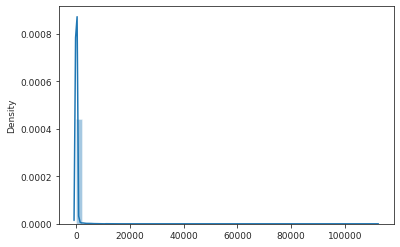

In [88]:
sns.distplot(rawdata.data[k]['light'])

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

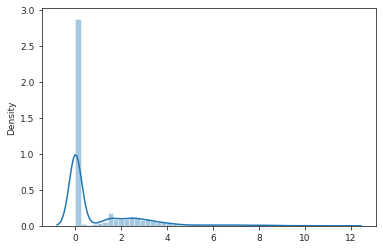

In [89]:
sns.distplot(np.log(rawdata.data[k]['light'] +1))

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

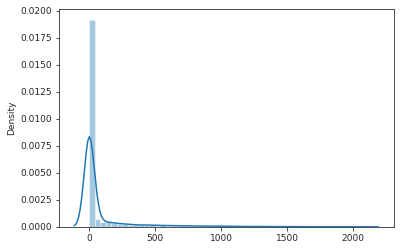

In [87]:
sns.distplot(rawdata.data[k]['activity'])

/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

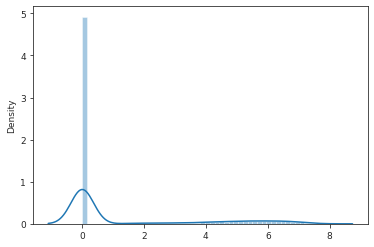

In [86]:
sns.distplot(np.log(rawdata.data[k]['activity']+1))

In [ ]:
len(np.unique([i.split('_')[0] for i in rawdata.exclude[k]] if isinstance(rawdata.exclude[k], list) else rawdata.exclude[k].split('_')[0]))))

In [43]:
print('Exclusion criteria (n_measurements, n_pts)')
for k in rawdata.exclude.keys():
    print('  {}: ({}, {})'.format(k, 
                               len(rawdata.exclude[k]), 
                               len(np.unique([i.split('_')[0] for i in rawdata.exclude[k]] if isinstance(rawdata.exclude[k], list) else rawdata.exclude[k].split('_')[0]))))


Exclusion criteria (n_measurements, n_pts)
  no_lux: (116, 110)
  chk_t: (7, 1)
  lt_1d: (7, 1)
  lt_max_t: (0, 0)
  corrupt_mtn: (7, 1)


In [76]:
rawdata.exclude.values()

dict_values([['2003_29', '2015_25', '1464_7', '1636_33', '2045_18', '1327_32', '1473_17', '2005_31', '2049_20', '1639_31', '2020_28', '1769_17', '1273_34', '1283_32', '1447_20', '2026_24', '2029_23', '2470_24', '2009_29', '2055_15', '2044_19', '1319_25', '2035_20', '1418_23', '1741_28', '1448_21', '1713_32', '1216_38', '1340_26', '2216_20', '2087_8', '1679_25', '1465_15', '1467_12', '2460_34', '1667_27', '1646_36', '1364_25', '2435_34', '1619_32', '1661_31', '1714_35', '1253_32', '2397_34', '1698_34', '1627_33', '1758_28', '1315_36', '2496_20', '1654_25', '1654_32', '2488_24', '1662_29', '1623_32', '1690_34', '1695_33', '1716_21', '1729_32', '1726_29', '1463_8', '1830_6', '1598_35', '1676_36', '1797_34', '1797_25', '1477_18', '2486_27', '1707_34', '1761_24', '1782_19', '1782_30', '1766_30', '1711_33', '1739_23', '1778_14', '1783_18', '1783_34', '1771_24', '1771_12', '1771_35', '2551_10', '1763_12', '1775_15', '1730_24', '1678_26', '2520_11', '1823_17', '1788_10', '1807_15', '2550_33', 

In [28]:
rawdata.exclude['lt_1d']

'1325_32'

In [27]:
rawdata.exclude['corrupt_mtn']

'1168_24'

In [46]:
rawdata.exclude['lt_max_t'].append('123')

In [47]:
rawdata.exclude['lt_max_t']

['123']

# dev

In [20]:
# select a random file
ID = np.random.choice(list(rawdata.IDs.keys()))
file = rawdata.IDs[ID]
print(ID)

raw = pyActigraphy.io.read_raw_mtn(file)
print(raw.name)

2633_22
2633


# grab metadata and labels


In [31]:
raw_fp='/home/ngrav/project/wearables/data/raw/MOD1000WomanActivityData20210707T213505Z-001/MOD 1000 Woman Activity Data/'
raw_md_fp='/home/ngrav/project/wearables/data/raw/MOD_Data_2021.csv'
raw_md = pd.read_csv(raw_md_fp, low_memory=False)

In [48]:
# import variable from file
from wearables.data.processed.md_pp_specification import *

In [34]:
# chk that all PIDs have info in the metadata (produce themd_pp_specificationmpty list)
IDs = list(rawdata.IDs.keys())
[i for i in IDs if int(i.split('_')[0]) not in raw_md['record_id'].tolist()]

[]

In [63]:
raw_md.loc[raw_md['record_id'].isin([int(i.split('_')[0]) for i in IDs] ), :].shape

(1260, 3081)

In [69]:
with open('/home/ngrav/scratch/IDs.pkl', 'wb') as f:
    pickle.dump(list(rawdata.IDs.keys()), f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()

In [57]:
def delete_problematic_measurements(exclude_list=['no_lux', 'corrupt_mtn', 'lt_1d', 'chk_t']):
    for problem in exclude_list:
        if isinstance(rawdata.exclude[problem], list):
            for k in list(rawdata.exclude[problem]):
                print(k)
                del rawdata.IDs[k]
                del rawdata.data[k]
        else:
            print(rawdata.exclude[problem])
            del rawdata.data[rawdata.exclude[problem]]
            del rawdata.IDs[rawdata.exclude[problem]]

In [59]:
# filter out the IDs
delete_problematic_measurements()

2003_29


KeyError: '2003_29'

# train test splits


# visuzlize from train based on md